In [37]:
import pandas as pd
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import keras

In [38]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [66]:
train_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


C:\Users\TAB\AppData\Local\Temp\ipykernel_12500\1274092236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.drop(columns=["id"]).corr()


<AxesSubplot: >

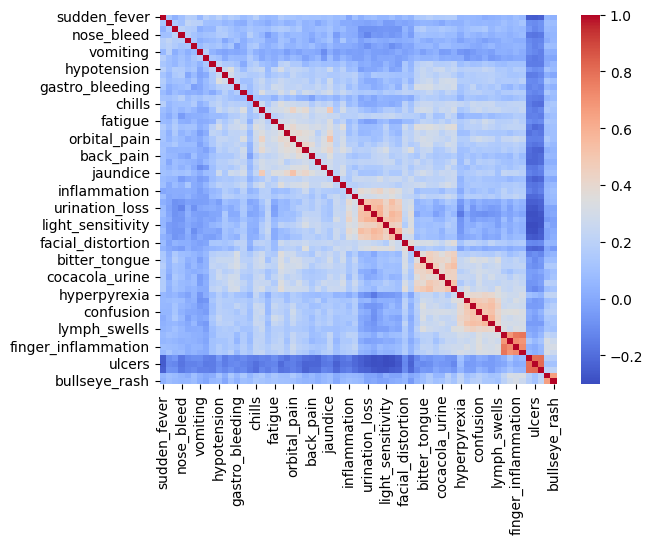

In [75]:
import seaborn as sns
corr = train_df.drop(columns=["id"]).corr()
sns.heatmap(corr, cmap='coolwarm')


Text(0, 0.5, 'headache')

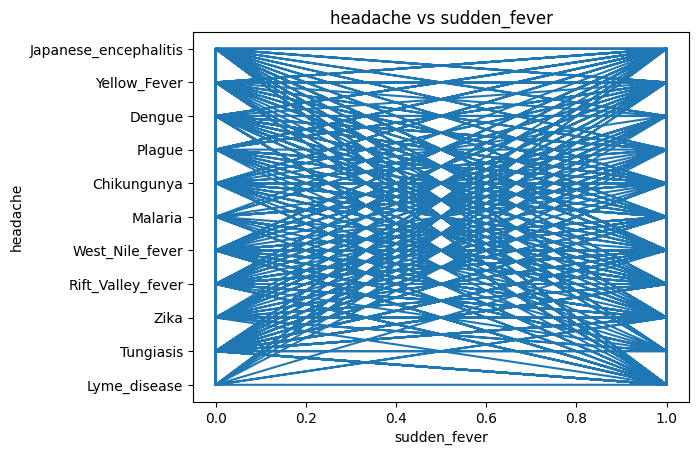

In [93]:
plt.plot(train_df['sudden_fever'], train_df['prognosis'])
plt.title('headache vs sudden_fever')
plt.xlabel('sudden_fever')
plt.ylabel('headache')


In [39]:
# PREPROCESSING THE DATA
from sklearn.model_selection import train_test_split

train = train_df.copy()
encoder = LabelEncoder()
train['prognosis'] = encoder.fit_transform(train['prognosis'])

train_target = train_df['prognosis']
train_features = train.drop(columns=['prognosis', 'id'])


X_train, X_test, y_train, y_test = train_test_split(train.drop(
    'prognosis', axis=1), train['prognosis'], random_state=42
    )

train_features

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(train_features.columns),)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense((len(train_target.unique())), activation='softmax'))


In [79]:
# DEFINING THE MODEL ARCHITECTURE

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(train_features.columns),)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(train_target.unique()), activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 11)                187       
                                                                 
Total params: 6,955
Trainable params: 6,955
Non-trainable params: 0
_________________________________________________________________


In [97]:
import tensorflow_addons as tfa

In [98]:
from keras.utils import to_categorical


#  Convert the target variable to categorical values
num_classes = len(encoder.classes_)
print(num_classes)
y_train = to_categorical(train['prognosis'], num_classes=num_classes)

11


In [56]:
len(train["prognosis"])

707

In [99]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tfa.metrics.MultiLabelConfusionMatrix(num_classes=len(train_target.unique()))])

history = model.fit(train_features, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
18/18 [==============================] - 1s 16ms/step - loss: 2.4450 - Multilabel_confusion_matrix: 141.2500 - val_loss: 2.3831 - val_Multilabel_confusion_matrix: 35.5000
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 2.3919 - Multilabel_confusion_matrix: 141.2500 - val_loss: 2.3738 - val_Multilabel_confusion_matrix: 35.5000
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 2.3997 - Multilabel_confusion_matrix: 141.2500 - val_loss: 2.3707 - val_Multilabel_confusion_matrix: 35.5000
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 2.3797 - Multilabel_confusion_matrix: 141.2500 - val_loss: 2.3656 - val_Multilabel_confusion_matrix: 35.5000
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 2.3644 - Multilabel_confusion_matrix: 141.2500 - val_loss: 2.3577 - val_Multilabel_confusion_matrix: 35.5000
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 2.3552 - Multilabel_co

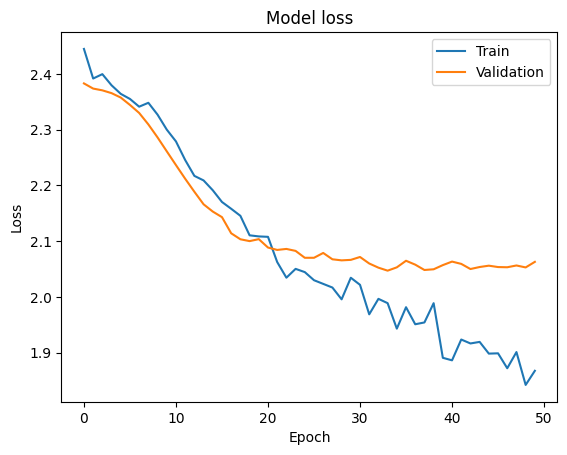

In [100]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [101]:
test_predictions = model.predict(test_df.drop(['id'], axis = 1))
test_predictions

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [59]:
# Get the sorted indices of predictions and take the top 3
import numpy as np


test_sorted_prediction_ids = np.argsort(-test_predictions, axis=1)
test_top_3_prediction_ids = test_sorted_prediction_ids[:,:3]

In [60]:

# Because enc.inverse_transform expects a specific shape (a 2D array with 1 column) we can save the original shape to reshape to after decoding
original_shape = test_top_3_prediction_ids.shape
test_top_3_predictions = encoder.inverse_transform(test_top_3_prediction_ids.reshape(-1, 1))
test_top_3_predictions = test_top_3_predictions.reshape(original_shape)
test_top_3_predictions[:10]

c:\Users\TAB\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([['Rift_Valley_fever', 'Dengue', 'Tungiasis'],
       ['Chikungunya', 'Dengue', 'Rift_Valley_fever'],
       ['Japanese_encephalitis', 'Malaria', 'West_Nile_fever'],
       ['Japanese_encephalitis', 'Zika', 'Tungiasis'],
       ['West_Nile_fever', 'Lyme_disease', 'Plague'],
       ['Zika', 'Yellow_Fever', 'West_Nile_fever'],
       ['Malaria', 'Japanese_encephalitis', 'Lyme_disease'],
       ['Dengue', 'Rift_Valley_fever', 'West_Nile_fever'],
       ['Zika', 'Yellow_Fever', 'West_Nile_fever'],
       ['Plague', 'West_Nile_fever', 'Japanese_encephalitis']],
      dtype=object)

In [61]:
# Now to get our array of labels into a single column for our submission we can just join on on a space across axis 1
test_df['prognosis'] = np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, test_top_3_predictions)
test_df['prognosis'][:10]

0               Rift_Valley_fever Dengue Tungiasis
1             Chikungunya Dengue Rift_Valley_fever
2    Japanese_encephalitis Malaria West_Nile_fever
3             Japanese_encephalitis Zika Tungiasis
4              West_Nile_fever Lyme_disease Plague
5                Zika Yellow_Fever West_Nile_fever
6       Malaria Japanese_encephalitis Lyme_disease
7         Dengue Rift_Valley_fever West_Nile_fever
8                Zika Yellow_Fever West_Nile_fever
9     Plague West_Nile_fever Japanese_encephalitis
Name: prognosis, dtype: object

In [62]:
test_df.to_csv('new_submission.csv', columns=['id', 'prognosis'], index=False)